In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
training_set = pd.read_csv('../Dataset/training_set.csv', sep=';')
testing_set = pd.read_csv('../Dataset/testing_set.csv', sep=';')

training_set_norm = pd.read_csv('../Dataset/training_set_normalized_y.csv', sep=';')
testing_set_norm = pd.read_csv('../Dataset/testing_set_normalized_y.csv', sep=';')

In [3]:
X_train = training_set_norm.drop(['y'], axis=1)
y_train = training_set_norm['y']

X_test = testing_set_norm.drop(['y'], axis=1)
y_test = testing_set_norm['y']

In [4]:
# Use the powertransformer to transform features and the target should be divided by the max value of the target
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
X_train = pt.fit_transform(X_train)
X_test = pt.transform(X_test)

y_train = y_train / y_train.max()
y_test = y_test / y_test.max()

Binning 0.004 GB of training data: 0.044 s
Binning 0.000 GB of validation data: 0.001 s
Fitting gradient boosted rounds:
[1/100000] 

/home/hugo/.local/lib/python3.10/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


1 tree, 400 leaves, max depth = 16, train loss: 0.00576, val loss: 0.00586, in 0.061s
[2/100000] 1 tree, 400 leaves, max depth = 16, train loss: 0.00567, val loss: 0.00576, in 0.064s
[3/100000] 1 tree, 400 leaves, max depth = 16, train loss: 0.00557, val loss: 0.00566, in 0.066s
[4/100000] 1 tree, 400 leaves, max depth = 16, train loss: 0.00547, val loss: 0.00557, in 0.058s
[5/100000] 1 tree, 400 leaves, max depth = 16, train loss: 0.00538, val loss: 0.00548, in 0.053s
[6/100000] 1 tree, 400 leaves, max depth = 16, train loss: 0.00529, val loss: 0.00539, in 0.057s
[7/100000] 1 tree, 400 leaves, max depth = 16, train loss: 0.00520, val loss: 0.00530, in 0.050s
[8/100000] 1 tree, 400 leaves, max depth = 15, train loss: 0.00511, val loss: 0.00521, in 0.058s
[9/100000] 1 tree, 400 leaves, max depth = 16, train loss: 0.00502, val loss: 0.00513, in 0.056s
[10/100000] 1 tree, 400 leaves, max depth = 15, train loss: 0.00494, val loss: 0.00504, in 0.067s
[11/100000] 1 tree, 400 leaves, max dept

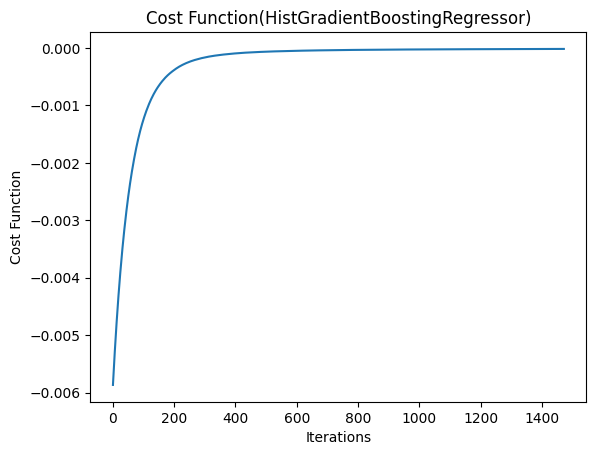

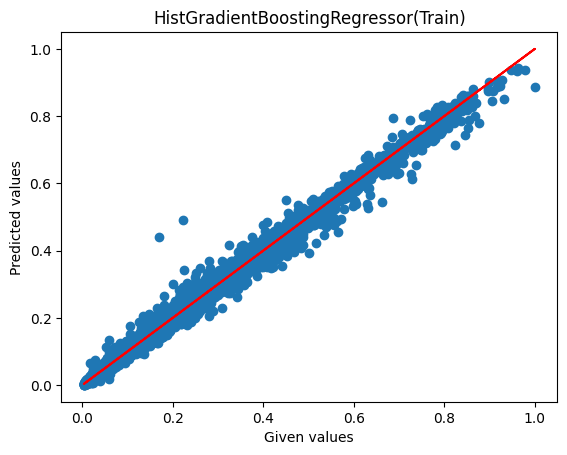

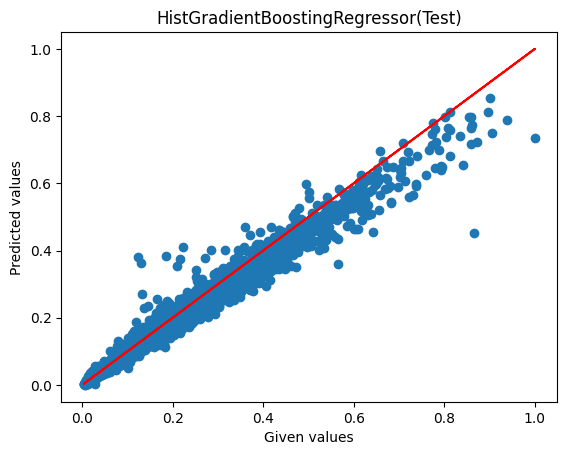

In [5]:
# Build a HistGradientBoostingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

hgb = HistGradientBoostingRegressor(max_iter=100000, learning_rate=0.01, max_depth=100, min_samples_leaf=20, max_leaf_nodes=400, verbose=1)
hgb.fit(X_train, y_train)

# Predict the test set results
y_pred = hgb.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('R2 Score(Train): ', r2_score(y_train, hgb.predict(X_train)))
print('R2 Score(Test): ', r2_score(y_test, y_pred))

# Plot the cost function
plt.plot(hgb.train_score_)
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.title('Cost Function(HistGradientBoostingRegressor)')
plt.show()

# Plot accuracy of the model (given values on the x and predicted values on the y)
plt.scatter(y_train, hgb.predict(X_train))
plt.plot(y_train, y_train, color='red')
plt.xlabel('Given values')
plt.ylabel('Predicted values')
plt.title('HistGradientBoostingRegressor(Train)')
plt.show()

plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Given values')
plt.ylabel('Predicted values')
plt.title('HistGradientBoostingRegressor(Test)')
plt.show()

In [6]:
# Build a Suppor Vector Machine for regression
from sklearn.svm import SVR
from math import log

num_features = X_train.shape[1]
num_features = log(num_features)
svr = SVR(kernel='rbf', C=1000, gamma='scale', epsilon=0.01, verbose=True)
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)


# Evaluate the model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt

print("Mean squared error: %.8f" % mean_squared_error(y_test, y_pred))
print("Mean absolute error: %.8f" % mean_absolute_error(y_test, y_pred))
print("Root mean squared error: %.8f" % sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score for train: %.8f" % r2_score(y_train, svr.predict(X_train)))
print("R2 score for test: %.8f" % r2_score(y_test, y_pred))

# Plot accuracy of the model (given values on the x and predicted values on the y)
plt.scatter(y_train, svr.predict(X_train))
plt.plot(y_train, y_train, color='red')
plt.xlabel('Given values')
plt.ylabel('Predicted values')
plt.title('Support Vector Machine(Train)')
plt.show()

plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Given values')
plt.ylabel('Predicted values')
plt.title('Support Vector Machine(Test)')
plt.show()

[LibSVM]............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [ ]:
# save the model to disk
import pickle

filename = 'SVR_model.sav'
pickle.dump(svr, open(filename, 'wb'))

In [ ]:
# Plot the residuals
plt.scatter(svr.predict(X_train), svr.predict(X_train) - y_train, c='b', s=40, alpha=0.5)
plt.scatter(svr.predict(X_test), svr.predict(X_test) - y_test, c='g', s=40)
plt.hlines(y=0, xmin=0, xmax=1)
plt.title('Residual plot using training (blue) and test (green) data')
plt.ylabel('Residuals')
plt.show()

In [ ]:
# Number of support vectors for each class
print(svr.n_support_)

In [ ]:
# Build a Decision Tree for regression
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=40)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt

print("Mean squared error: %.8f" % mean_squared_error(y_test, y_pred))
print("Mean absolute error: %.8f" % mean_absolute_error(y_test, y_pred))
print("Root mean squared error: %.8f" % sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score(for train): %.8f" % r2_score(y_train, tree.predict(X_train)))
print("R2 score(for test): %.8f" % r2_score(y_test, y_pred))

# Plot the results
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, label='Actual')
plt.scatter(y_pred, y_pred, label='Predicted')
plt.legend()
plt.show()

In [ ]:
# Build a random forest for regression
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=200, max_depth=40)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt

print("Mean squared error: %.8f" % mean_squared_error(y_test, y_pred))
print("Mean absolute error: %.8f" % mean_absolute_error(y_test, y_pred))
print("Root mean squared error: %.8f" % sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score(for train): %.8f" % r2_score(y_train, forest.predict(X_train)))
print("R2 score(for test): %.8f" % r2_score(y_test, y_pred))

# Plot the results
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, label='Actual')
plt.scatter(y_pred, y_pred, label='Predicted')
plt.legend()
plt.show()